# MSiA 432 - Deep Learning - Final Project
# Group #: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# General EDA

# Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Data

#### Set the path to the dataset folder

In [2]:
#dataset_path = r'C:\Users\nuke2\Desktop\NW Work\Data\432_project\face_age'
dataset_path = '../02_Data/face_age/'

#### Display age distribution

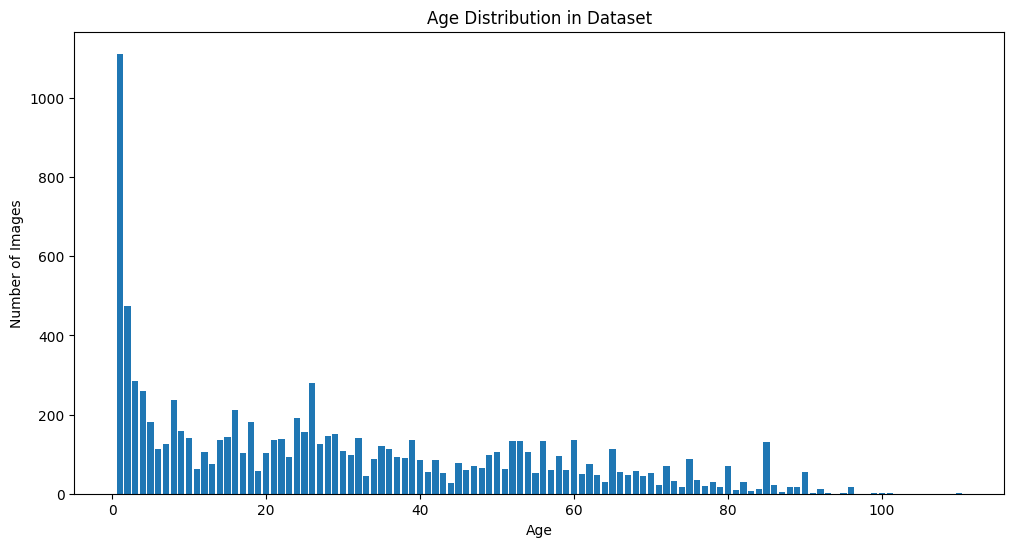

In [3]:
# Count the number of images per age (i.e files per folder)
age_counts = []
for age_folder in os.listdir(dataset_path):
    # Omit .DS_Store folder
    if age_folder != '.DS_Store':
        age = int(age_folder)
        age_count = len(os.listdir(os.path.join(dataset_path, age_folder)))
        age_counts.append((age, age_count))

# Create a DataFrame and sort by age
age_df = pd.DataFrame(age_counts, columns=['age', 'count'])
age_df = age_df.sort_values('age')

# Plot the age distribution
plt.figure(figsize=(12, 6))
plt.bar(age_df['age'], age_df['count'])
plt.xlabel('Age')
plt.ylabel('Number of Images')
plt.title('Age Distribution in Dataset')
plt.show()


#### Display sample images

In [ ]:
# Show sample images
sample_ages = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90]
n_samples = len(sample_ages)
plt.figure(figsize=(15, 5))

for i, sample_age in enumerate(sample_ages, 1):
    age_folder = os.path.join(dataset_path, f'{sample_age:03d}')
    
    sample_image = os.listdir(age_folder)[0]
    image_path = os.path.join(age_folder, sample_image)
    image = Image.open(image_path)
    
    plt.subplot(2, n_samples // 2, i)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Age {sample_age}')

plt.suptitle('Sample Images from Dataset')
plt.show()

# View any photo in the directory

#### Create dictionary of image file names

In [4]:
# Create a dictionary to store the age and corresponding image file names
age_image_dict = {}

# Loop through each age folder and populate the dictionary
for age_folder in os.listdir(dataset_path):
    if age_folder != '.DS_Store':
        age = int(age_folder)
        image_files = os.listdir(os.path.join(dataset_path, age_folder))
        age_image_dict[age] = image_files

#### View any photo

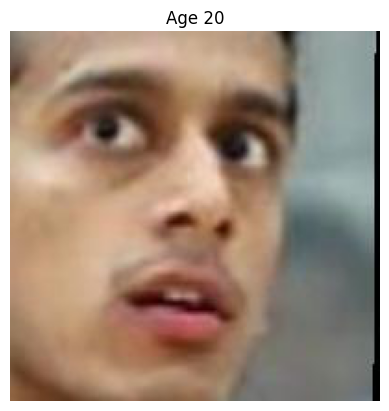

In [6]:
# Choose a specific age and image index to display
age_to_display = 20
image_index = 5

# Get the image file name from the dictionary
image_file = age_image_dict[age_to_display][image_index]

# Create the full image path
image_path = os.path.join(dataset_path, f'{age_to_display:03d}', image_file)

# Load the image using PIL
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.title(f'Age {age_to_display}')
plt.show()
